In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import time

# <center> Matrix methods and physics - Part I </center>

In this notes we shall look how matrix methods, such as matrix multiplication, the calculation of matrix inverses and the numerical solution of eigenvalue problems, help us solve physics problems.

## <center> Matrix inversion and the 1D Poisson equation </center>

Suppose we wish to solve the 1D Poisson equation
\begin{equation}
\dfrac{d^2 \phi(x)}{dx^2} = f(x)
\end{equation}
with a **source term** f(x), and the following simple **Dirichlet boundary conditions**.
\begin{equation}
\phi(x = 0) = a, \qquad \phi(x = 1) = b
\end{equation}
That is, we are interested in a function $\phi(x)$ on the interval $x \in [0,1]$ which (1) has a specific value at the boundaries and (2) satisfies the above differential equation.

At its current form, the problem is intractable for a computer. Unless we wish to teach Python the entirety of analytic techniques concerning calculus, we must translate the above problem into a closely related problem which approximates the solution $\phi(x)$.

### <center> Discretization </center>

The function $\phi(x)$ has an infinite amount of information. To solve it exactly, we must provide an infinite amount of information on an infinite number of points. The concept of discretization is that we may solve a related problem on a finite number of points (usually a large set of algebraic equations), handling only a finite amount of information, and convince ourselves that the related problem approximates the exact solution as the number of finite points becomes arbitrarily large.

In this notes, we shall be looking at the following related problem:

We begin with an equally spaced mesh on the interval $[0,1]$,
\begin{equation}
X = \{x_i\}, \qquad i = 0, 1, 2, \dots, N
\end{equation}
where
\begin{equation}
x_0 = 0, \qquad x_N = 1, \qquad (\forall i \in 0, 1, \dots, N-1) : x_{i+1} - x_i = h.
\end{equation}
We wish to solve for the function values $\phi(x)$ at each point on the mesh,
\begin{equation}
\Phi = \{ \phi_i \}, \qquad i = 0, 1, 2, \dots, N
\end{equation}
where $\phi_i$ is related to the original smooth problem with
\begin{equation}
\phi_i = \phi(x_i)
\end{equation}
We may similarly discretize the source term $f(x)$, by defining
\begin{equation}
F = \{ f_i \}, \qquad, i = 0, 1, 2, \dots, N
\end{equation}
where
\begin{equation}
f_i = f(x_i)
\end{equation}
So far, we had discretized the interval $X$, the source term $F$ and the solution $\Phi$. How do we discretize the above differential equations and boundary conditions?

The boundary conditions is easy enough!
\begin{equation}
\phi_0 = a, \qquad \phi_N = b
\end{equation}
We only need to solve for all the interior points. Now here's the punchline: consider the following algebraic equation for the set of unknowns $\phi_i$:
\begin{equation}
\dfrac{\phi_{i+1} - 2 \phi_i + \phi_{i-1}}{h^2} = f_i
\end{equation}
If we look how this algebraic equation is related to the original smooth problem, we simply use the above maps
\begin{equation}
\dfrac{\phi(x_{i+1}) - 2\phi(x_i) + \phi(x_{i-1})}{h^2} = f(x_i), \qquad i = 1, 2, \dots, N-1
\end{equation}
Now we use the fact that the mesh of points is equally spaced to express $x_{i+1}$ and $x_{i-1}$ in terms of $x_i$,
\begin{equation}
\dfrac{\phi(x_{i} + h) - 2\phi(x_i) + \phi(x_{i} - h)}{h^2} = f(x_i)
\end{equation}
So now the question is, how closely does the algebraic equation match the Poisson equation? To find this out, we may expand this around $x = x_i$, noting that
\begin{equation}
\phi(x_i \pm h) = \phi(x_i) \pm h \dfrac{d \phi(x_i)}{dx} + \dfrac{h^2}{2} \dfrac{d^2 \phi(x_i)}{dx^2} \pm \dfrac{h^3}{6} \dfrac{d^3 \phi(x_i)}{dx^3} + \dfrac{h^4}{24} \dfrac{d^4 \phi(x_i)}{dx^4} + O(h^5)
\end{equation}
You should be able to show that the above equation reduces to
\begin{equation}
\dfrac{d^2 \phi(x_i)}{dx^2} + \dfrac{h^2}{12} \dfrac{d^4 \phi(x_i)}{dx^4} = f(x_i)
\end{equation}
Thus the algebraic equation is accurate to order $h^2$ at each point $x_i$. If we increase the number of points (and therefore decrease the size of $h$), this extra term is suppressed further and the algebraic equation matches the infinitely smooth problem at each point $x_i$ more accurately!

___

Notice that we have a set of linear algebraic equations to solve for the set of coefficients $\phi_i$. We should be able to write this down as a matrix equation!

The algebraic equation
\begin{equation}
\dfrac{\phi_{i+1} - 2 \phi_i + \phi_{i-1}}{h^2} = f_i
\end{equation}
is generic for most values of $i$. we may clean it up by transfering the $h^2$ term on the source side,
\begin{equation}
\phi_{i+1} - 2 \phi_i + \phi_{i-1} = h^2 f_i
\end{equation}

Two values of $i$ differ from the rest, and those are related to when $\phi_0$ and $\phi_N$ appear, whose values we already know, and thus we may transfer on the 'source' side of the equation. For $i = 1$,
\begin{equation}
\phi_{2} - 2 \phi_1 + \phi_{0} = h^2 f_1 \qquad \to \qquad \phi_2 - 2 \phi_1 = h^2 f_1 - a
\end{equation}
For $i = N-1$,
\begin{equation}
\phi_{N} - 2 \phi_{N-1} + \phi_{N-2} = h^2 f_{N-1} \qquad \to \qquad \phi_{N-1} - 2 \phi_{N-2} = h^2 f_{N-1} - b
\end{equation}

The matrix equation thus looks like, for some $N$,
\begin{equation}
\begin{pmatrix}
-2 & 1 & 0 & 0 & \dots & 0\\
1 & -2 & 1 & 0 & \dots & 0 \\
0 & 1 & -2 & 1 & \dots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \dots & 1 & -2 & 1 & 0 \\
0 & \dots & 0 & 1 & -2 & 1 \\
0 & \dots & 0 & 0 & 1 & -2
\end{pmatrix}
\begin{pmatrix}
\phi_1 \\ \phi_2 \\ \phi_3 \\ \vdots \\ \phi_{N-3} \\ \phi_{N-2} \\ \phi_{N-1}
\end{pmatrix}
= \begin{pmatrix}
h^2 f_1 - a \\ h^2 f_2 \\ h^2 f_3 \\ \vdots \\ h^2 f_{N-3} \\ h^2 f_{N-2} \\ h^2 f_{N-1} - b
\end{pmatrix}
\end{equation}

___

Thus to solve the Poisson equation, we need to simply calculate two things.
1. The source vector,
\begin{equation}
\tilde{F} = 
\begin{pmatrix}
h^2 f_1 - a \\ h^2 f_2 \\ h^2 f_3 \\ \vdots \\ h^2 f_{N-3} \\ h^2 f_{N-2} \\ h^2 f_{N-1} - b
\end{pmatrix}
\end{equation}
2. The inverse of a tri-diagonal matrix,
\begin{equation}
A = 
\begin{pmatrix}
-2 & 1 & 0 & 0 & \dots & 0\\
1 & -2 & 1 & 0 & \dots & 0 \\
0 & 1 & -2 & 1 & \dots & 0 \\
\vdots & \ddots & \ddots & \ddots & \ddots & \vdots \\
0 & \dots & 1 & -2 & 1 & 0 \\
0 & \dots & 0 & 1 & -2 & 1 \\
0 & \dots & 0 & 0 & 1 & -2
\end{pmatrix}
\end{equation}

This lets us calculate $\Phi$,
\begin{equation}
\Phi = A^{-1} \tilde{F}
\end{equation}

### <center> Model problems </center>

Important to the development of any numerical method is your ability to generate a suitable test bed for calculations. Armed with an exact solution, one can determine quite easily when something has gone wrong. Here, we shall show how to generate one such test bed.

For the Poisson equation, we need only supply a solution $\phi(x)$, and its second derivative we simply use as the source term. That is, if we use
\begin{equation}
\phi(x) = \sin(\pi x^2)
\end{equation}
then it is clear that
\begin{equation}
f(x) = 2 \pi \cos(\pi x^2) - 4 \pi^2 x^2 \sin(\pi x^2), \qquad \phi(0) = \phi(1) = 0
\end{equation}
This will be the model problem which we shall look at.

In [2]:
def solve_Poisson(x, f, a, b):
    N = len(x)
    h = x[1]-x[0]
    
    ## generate F-tilde
    F_tilde = h**2 * f(x[1:-1]) ## we remove the boundary points
    F_tilde[0] += a
    F_tilde[-1] += b
    
    ## generate A
    A = np.zeros((N-2,N-2)) ## we remove the boundary points
    for i in range(N-3):
        A[i,i] = -2 #diagonal
        A[i+1,i] = 1
        A[i,i+1] = 1
    A[-1,-1] = -2
    
    ## generate A_inv
    A_inv = la.inv(A)
    
    #calculate interior points
    phi = np.dot(A_inv, F_tilde)
    
    #add boundary points
    phi = np.insert(phi,a,0)
    phi = np.append(phi,b)
    
    return phi

In [3]:
def f(x):
    x2 = x*x
    return 2 * np.pi * np.cos(np.pi * x2) - 4 * np.pi * np.pi * x2 * np.sin(np.pi * x2)

def sol(x):
    return np.sin(np.pi * x * x)

xmin = 0
xmax = 1
a = 0
b = 0
n = 31

x = np.linspace(xmin, xmax, n)
phi = solve_Poisson(x, f, a, b)

Let us check how well our numerical solution and the exact solution matches!

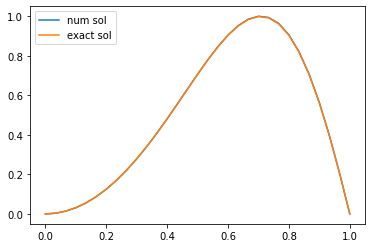

In [4]:
plt.plot(x,phi, label='num sol')
plt.plot(x,sol(x), label = 'exact sol')
plt.legend()

Let's look at the error at each point

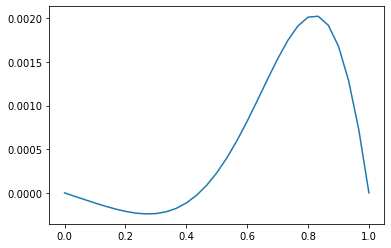

In [5]:
plt.plot(x, phi - sol(x))

Notice that the error looks like a smooth function. This is expected! If the discrete solution, say $\tilde{\phi}$ approximately solves the differential equation
\begin{equation}
\dfrac{d^2 \tilde{\phi}(x)}{dx^2} + \dfrac{h^2}{12} \dfrac{d^4 \tilde{\phi}(x)}{dx^4} = f(x),
\end{equation}
then we may relate the exact solution $\phi(x)$, which satisfies
\begin{equation}
\dfrac{d^2 \phi(x)}{dx^2} = f(x),
\end{equation}
with
\begin{equation}
\tilde{\phi} = \phi + e.
\end{equation}
If we plug in the above equation into the second expression above, we get
\begin{equation}
\dfrac{d^2 (\tilde{\phi} - e)}{dx^2} = f(x) \to \dfrac{d^2 \tilde{\phi}}{dx^2} - \dfrac{d^2 e}{dx^2} = f(x)
\end{equation}
Replacing
\begin{equation}
\dfrac{d^2 \tilde{\phi}(x)}{dx^2} = f(x) - \dfrac{h^2}{12} \dfrac{d^4 \tilde{\phi}(x)}{dx^4},
\end{equation}
we therefore get
\begin{equation}
f(x) - \dfrac{h^2}{12} \dfrac{d^4 \tilde{\phi}(x)}{dx^4} - \dfrac{d^2 e}{dx^2} = f(x) \qquad \to \qquad \dfrac{d^2 e}{dx^2} = - \dfrac{h^2}{12} \dfrac{d^4 \tilde{\phi}(x)}{dx^4} \qquad \to \qquad e = - \dfrac{h^2}{12} \dfrac{d^2 \tilde{\phi}(x)}{dx^2} + c_0 + c_1 x
\end{equation}
We may use the first expression above once to get
\begin{equation}
e = c_0 + c_1 x - \dfrac{h^2}{12} f(x) + O(h^4)
\end{equation}
Since the boundary conditions are satisfied exactly, the error similarly vanishes at the boundaries
\begin{equation}
e(0) = e(1) = 0
\end{equation}
This lets us calculate what $c_0$ and $c_1$ are,
\begin{equation}
e(0) = 0 \qquad \to \qquad 0 = c_0 - \dfrac{h^2}{12} f(0) \qquad \to \qquad c_0 = \dfrac{h^2}{12} f(0)
\end{equation}
\begin{equation}
e(1) = 0 \qquad \to \qquad 0 = \dfrac{h^2}{12} f(0) + c_1 - \dfrac{h^2}{12} f(1) \qquad \to \qquad c_1 = \dfrac{h^2}{12} \left( f(1) - f(0) \right)
\end{equation}
Thus,
\begin{equation}
\tilde{\phi} - \phi \approx \dfrac{h^2}{12} \left( f(0) + (f(1) - f(0)) x - f(x) \right)
\end{equation}
which we may check!

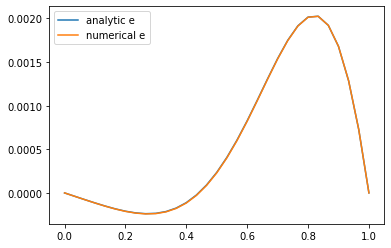

In [6]:
h = x[1]-x[0]
plt.plot(x, (h*h/12)*( f(0) + (f(1) - f(0)) * x - f(x) ), label='analytic e' )
plt.plot(x, phi - sol(x), label='numerical e')
plt.legend()

Everything is in order. Even the error matches our analytic predictions!

All of this effort of testing a numerical method with a very well-understood test bed was in service for the eventual deployment of our numerical method on sources $f(x)$ and boundary conditions whose solution we do not know. If we can trust the result of our method with the model problem, maybe we can trust it when we try to solve other, more interesting physical problems.

## <center> Final thoughts </center>

In Part I, we demonstrated how to translate differential problems into a related problem which computers can handle. We did the following

1. We defined a finite, discrete mesh of points $X$.
2. We defined a finite set of function evaluations on that mesh, which includes the unknown solution
3. We prescribed a set of algebraic equations that the quantities we had defined in (1) and (2) must satisfy, which approximates the differential equation on a set of points on the domain of the solution.

These algebraic equations are called finite difference schemes. Note that the finite difference scheme we implemented in Part I approximated the differential equation on the points on $X$. This is not necessary. We may, for example, impose finite difference schemes which are satisfied on the midpoints of $X$, as in
\begin{equation}
\dfrac{\phi_{i-1} - \phi_{i} - \phi_{i+1} + \phi_{i+2}}{2 h^2} = \dfrac{f_{i}+f_{i+1}}{2}, \qquad i = 1,2,\dots,N-1
\end{equation}
which when expanded around $x = \dfrac{x_i + x_{i+1}}{2}$, yields
\begin{equation}
\dfrac{d^2\phi(x)}{dx^2} + \dfrac{5}{24} h^2 \dfrac{d^4\phi(x)}{dx^4} = f(x) + \dfrac{1}{8}h^2 \dfrac{d^2 f(x)}{dx^2}
\end{equation}
which again approximates the Poisson equation to order $O(h^2)$.

This finite difference scheme becomes more complicated, since the expansion around
\begin{equation}
x = \dfrac{x_{N-1} + x_N}{2}
\end{equation}
does not work. The algebraic equation now includes a function evaluation $\phi_{N+1}$ outside our mesh, coming from $\phi_{i+2}$ when we plug in $N-1$.

We had already experienced this boundary woes with our current example, for $i = 1, N-1$. It just so happens that the resolution is very easy: the $\phi_0$ and $\phi_N$ terms are just lumped together with the source terms. For higher order methods, we need to do something more complicated, such as supplying a different algebraic equation for the problem points. 